<a href="https://colab.research.google.com/github/dansojo/Medical_CV/blob/main/CT_Edge_Enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import matplotlib.pyplot as plt
from skimage import io

**정규화된 CT 이미지를 uint8로 변환된 상태로 로드 (이미 0-1로 정규화된 이미지라 가정)**

In [3]:
# CT 이미지 로드

image_path = '/content/drive/MyDrive/Medical_CV/CT/CT 이미지/왼쪽_선암.png'
ct_image = io.imread(image_path, as_gray=True)

In [4]:
# 해당 이미지의 경우 정규화된 CT 이미지 이므로 바로 uint8 형식으로 변환

ct_image_uint8 = (ct_image * 255).astype('uint8')  # uint8 변환

파라미터 설명

In [5]:
# cv2.CV_64F는 OpenCV에서 사용하는 데이터 타입 지정 상수로, 여기서 CV_64F는
# 64비트 부동 소수점(double precision floating point)을 의미합니다.

# 엣지 검출 필터는 미분 연산을 통해 경계를 계산하는데, 이 과정에서 음수 값이 발생
# 기본 데이터 타입(unit8) 에서는 음수 값을 표현할 수 없기 때문에 CV_64F
# 64 비트 부동 소수점 형식으로 결과를 변환하여 저장

# CV_64F는 높은 정밀도와 더 넓은 범위를 제공하여, 미분 연산 결과를 정확하게 표현
# 미분 연산 결과를 정확하게 표현 할 수 있게 한다.

# 이후, cv2.convertScaleAbs() 함수를 사용해 절대값을 취하고
# uint8로 변환하여 시각화에 적합한 정수형 데이터로 변환한다.

**Sobel 필터** => x , y 를 따로 강조하고 합성하는 방식으로 노이즈에 강한 결과 제공 가능

---

sobel_x  = cv2.Sobel(이미지_경로, ddepth=cv2.CV_64F, dx=dx, dy=0, ksize=커널크기)

sobel_y = cv2.Sobel(이미지_경로, ddepth=cv2.CV_64F, dx=0, dy=dy, ksize=커널크기)


In [6]:
# Edge Enhancement 적용 (Sobel 필터 사용)
# 수평 및 수직 방향 경계 검출

# ddepth는 출력 이미지의 데이터 깊이로, 일반적으로
# cv2.CV_64F로 설정하여 음수 값을 포함할 수 있게 합니다.

# Sobel 필터는 dx, dy 값을 조절하여 x와 y 방향 경계를 선택적으로 강조 할 수 있다.

# ksize는 커널 크기(필터 크기)로, 일반적으로
# 홀수(3, 5, 7 등)를 사용하여 필터링 강도를 조정합니다.

# Sobel 필터는 1차 미분을 사용하여 x 또는 y 방향의 경계를 강조
# 해당 case 처럼 x, y를 각각 구한 경우, 합성 작업을 진행해야 모든 방향의 경계 확인 가능
# 특정 방향의 경계를 조절하여 선택적으로 강조 가능한 장점이 있다.
# 노이즈에 더 강한 모습을 갖는다.

# 각각 나눠서 한 경우 추가 합성 작업은 필수적이다.

sobel_x = cv2.Sobel(ct_image_uint8, cv2.CV_64F, 1, 0, ksize=3)  # x 방향 경계
sobel_y = cv2.Sobel(ct_image_uint8, cv2.CV_64F, 0, 1, ksize=3)  # y 방향 경계

# 두 방향 경계 합성 및 절대값 취해 uint8로 변환
sobel_combined = cv2.convertScaleAbs(cv2.magnitude(sobel_x, sobel_y))

**Laplacian 필터** =>
빠르고 간단하게 모든 방향의 경계 강조 유리

---

laplacian = cv2.Laplacian(이미지_경로, ddepth=cv2.CV_64F, ksize=커널크기)

In [7]:
# Edge Enhancement 적용 (Laplacian 필터 사용)

# ddepth는 출력 이미지의 데이터 깊이로, 일반적으로
# cv2.CV_64F로 설정하여 음수 값을 포함할 수 있게 합니다

# ksize는 커널 크기(필터 크기)로, 일반적으로
# 홀수(3, 5, 7 등)를 사용하여 필터링 강도를 조정합니다.

# Laplacian 필터는 2차 미분을 사용하여 모든 방향의 경계를 한 번에 강조

# 이미지의 경계를 한 번에 확인할 수 있으므로,
# 모든 방향의 경계를 동시에 강조하고자 할 때 효율적입니다.

# 모든 방향의 경계를 즉각적으로 강조할 수 있고다.
# x, y를 따로 설정할 필요가 없어서, 비교적 간단하게 경계 전체를 강조할 수 있다.

# 2차 미분의 특성상 노이즈에 민감하여,
# 해당 이미지에 노이즈가 많을 경우 더 많은 필터링이 필요


laplacian = cv2.Laplacian(ct_image_uint8, cv2.CV_64F, ksize=3)
laplacian_image = cv2.convertScaleAbs(laplacian)

**필터링 전후 시각화**

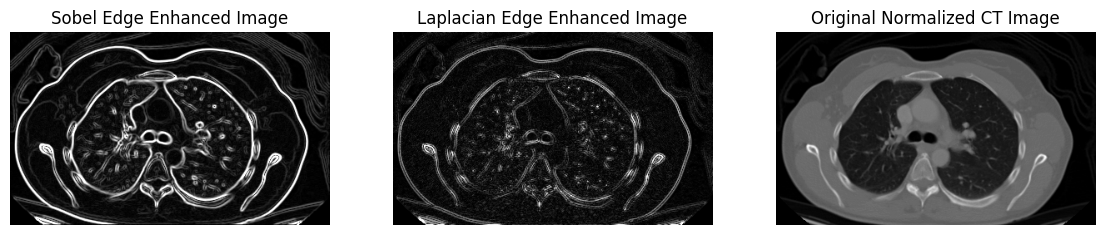

In [8]:
# 4. 필터링 전후 시각화
plt.figure(figsize=(14, 7))

# Sobel 필터 결과
plt.subplot(1, 3, 1)
plt.imshow(sobel_combined, cmap='gray')
plt.title("Sobel Edge Enhanced Image")
plt.axis('off')

# Laplacian 필터 결과
plt.subplot(1, 3, 2)
plt.imshow(laplacian_image, cmap='gray')
plt.title("Laplacian Edge Enhanced Image")
plt.axis('off')

# 원본 정규화된 CT 이미지
plt.subplot(1, 3, 3)
plt.imshow(ct_image_uint8, cmap='gray')
plt.title("Original Normalized CT Image")
plt.axis('off')

plt.show()